# Chess Image Feature Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn.neighbors as sn
import skimage.transform as skt
import tqdm as t
import os
from sklearn import svm

In [2]:
featureTr = []
labelTr = []

In [3]:
#Convert file to png

# from PIL import Image
# directory = 'Chess'
# for _classname in sorted(os.listdir(directory)):
#     for _name in sorted(os.listdir(directory + '/' + _classname)):
#         path = directory + '/' + str(_classname) + '/' + str(_name)
#         image = Image.open(path)
#         path = 'Chess_formatted' + '/' + str(_classname) + '/' + str(_name)
#         path = path.replace(path[path.find('.'):], '.png')
#         image.save(path)

## Train

### Feature extraction (Radon Transform)

In [ ]:
#Convert image to radon array

directory = 'Chess_formatted/train'

for _classname in sorted(os.listdir(directory)):
    for _name in sorted(os.listdir(directory + '/' + _classname)):
        path = directory + '/' + str(_classname) + '/' + str(_name)
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)

        tta = np.linspace(0., 180., max(img.shape), endpoint=False)
        sinogram = skt.radon(img, theta=tta)

        featureTr.append(np.array(sinogram).reshape(-1,1))
        labelTr.append(_classname)
        
featureTr = np.array(featureTr).reshape(554,-1)
labelTr = np.array(labelTr)




### KNN Model

In [5]:
clf_knn = sn.KNeighborsClassifier(n_neighbors=6, metric='euclidean')
clf_knn.fit(featureTr, labelTr)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

### SVM Model

In [6]:
clf_svm = svm.SVC(kernel='poly',degree=6, C=1, decision_function_shape='ovo',)
clf_svm.fit(featureTr, labelTr)

SVC(C=1, decision_function_shape='ovo', degree=6, kernel='poly')

## Test

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureTr, labelTr, test_size=0.15, random_state=7)

(470, 1024)
(470,)
(84, 1024)


In [7]:
labelTs = [] # True value
featureTs_KNN = [] # Predict value
featureTs_SVM = [] # Predict value

In [8]:
directory = 'Chess_formatted/test'

for _classname in sorted(os.listdir(directory)):
    for _name in sorted(os.listdir(directory + '/' + _classname)):
        path = directory + '/' + str(_classname) + '/' + str(_name)
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)

        sinogram = skt.radon(img, theta=tta)
        featureTs = np.array(sinogram).reshape(1,-1)

        out_KNN = clf_knn.predict(featureTs)
        out_SVM = clf_svm.predict(featureTs)
        featureTs_KNN.append(out_KNN)
        featureTs_SVM.append(out_SVM)
        labelTs.append(_classname)

featureTs_KNN = np.array(featureTs_KNN).reshape(120,-1)
featureTs_SVM = np.array(featureTs_SVM).reshape(120,-1)
labelTs = np.array(labelTs)

/home/tunwongchai/anaconda3/lib/python3.9/site-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '
libpng warning: iCCP: known incorrect sRGB profile
/home/tunwongchai/anaconda3/lib/python3.9/site-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '
libpng warning: iCCP: known incorrect sRGB profile
/home/tunwongchai/anaconda3/lib/python3.9/site-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '
/home/tunwongchai/anaconda3/lib/python3.9/site-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  wa

### Accuracy

In [9]:
from sklearn.metrics import classification_report
print(classification_report(labelTs, featureTs_SVM,
                            target_names=clf_svm.classes_))

              precision    recall  f1-score   support

      Bishop       0.94      0.85      0.89        20
        King       0.94      0.75      0.83        20
      Knight       1.00      0.90      0.95        20
        Pawn       1.00      0.95      0.97        20
       Queen       0.67      1.00      0.80        20
        Rook       1.00      0.95      0.97        20

    accuracy                           0.90       120
   macro avg       0.92      0.90      0.90       120
weighted avg       0.92      0.90      0.90       120



In [10]:
from sklearn.metrics import accuracy_score

score_knn = accuracy_score(labelTs, featureTs_KNN)
score_svm = accuracy_score(labelTs, featureTs_SVM)

print("KNN Model Accuracy:", score_knn)
print("SVM Model Accuracy:", score_svm)

KNN Model Accuracy: 0.375
SVM Model Accuracy: 0.9


### Confusion Matrix plot

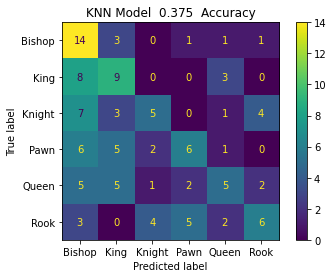

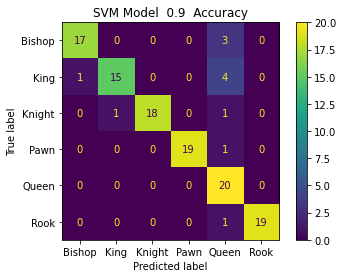

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(labelTs, featureTs_SVM)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=clf_svm.classes_)

cm_knn = confusion_matrix(labelTs, featureTs_KNN)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=clf_knn.classes_)


disp_knn.plot()
disp_knn.ax_.set_title('KNN Model  '+str(score_knn)+'  Accuracy')

disp_svm.plot()
disp_svm.ax_.set_title('SVM Model  '+str(score_svm)+'  Accuracy')

plt.show()

In [12]:
X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print(y)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)
